# Flux Vision Data (Hotspot)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import seaborn as sns
# sns.set()
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import geoplot as gpl
import json
import mapclassify


%matplotlib inline

In [18]:
# read csv file

# pd.read_csv('../../data/export_csv/Flux_24h')
df = pd.read_csv('../../data/export_csv/Flux_24h.csv',sep = ';')
# df = df.groupby(by=['Date','Origin','Destination'], as_index=0).sum()

# Date Conversion
df['Date'] = pd.to_datetime(df['Date'])
df['Date_day'] = df['Date'].dt.weekday

df

Date Origin Destination Immobility         Home_Category  \
0        2020-02-01    Aba     Gombari         1h      Outside_Resident   
1        2020-02-01    Aba     Gombari         1h      Outside_Resident   
2        2020-02-01    Aba     Gombari         1h   Study_Zone_Resident   
3        2020-02-01    Aba     Gombari         1h  Origin_Zone_Resident   
4        2020-02-01    Aba     Gombari         1h  Origin_Zone_Resident   
...             ...    ...         ...        ...                   ...   
48562224 2021-01-03  Zongo     Tandala         1h      Outside_Resident   
48562225 2021-01-03  Zongo     Tandala         3h      Outside_Resident   
48562226 2021-01-03  Zongo     Tandala         3h      Outside_Resident   
48562227 2021-01-03  Zongo     Tandala         3h      Outside_Resident   
48562228 2021-01-03  Zongo     Tandala         3h  Origin_Zone_Resident   

                Activity_Category Observation_Zone       Mode  Volume  \
0                  Outside_Worker      ZoneGlobale  All_modes    9747   
1         Destination_Zone_Worker      ZoneGlobale  All_modes    5119   
2               Study_Zone_Worker      ZoneGlobale  All_modes      66   
3         Destination_Zone_Worker      ZoneGlobale  All_modes    5153   
4              Origin_Zone_Worker      ZoneGlobale  All_modes   55998   
...                           ...              ...        ...     ...   
48562224       Origin_Zone_Worker      ZoneGlobale  All_modes    3782   
48562225           Outside_Worker      ZoneGlobale  All_modes    2613   
48562226  Destination_Zone_Worker      ZoneGlobale  All_modes    1306   
48562227       Origin_Zone_Worker      ZoneGlobale  All_modes    1306   
48562228  Destination_Zone_Worker      ZoneGlobale  All_modes    1306   

          Date_day  
0                5  
1                5  
2                5  
3                5  
4                5  
...            ...  
48562224         6  
48562225         6  
48562226         6  
48562227         6  
48562228         6  

[48562229 rows x 10 columns]

In [100]:
#Filter data for 3h only
df = df[(df.Immobility == '3h') & (df.Origin != 'Hors_Zone') & (df.Destination != 'Hors_Zone')]

In [101]:
df_hostpot = df[(df.Observation_Zone != 'ZoneGlobale')&(df.Observation_Zone != 'Inconnue')]
df_hostpot = df_hostpot.groupby(by=['Date','Origin','Destination','Observation_Zone','Date_day'], as_index=0).sum()
df_hostpot

Date       Origin  Destination               Observation_Zone  \
0       2020-05-17      Barumbu  Binza Meteo                 Arret Bakayaou   
1       2020-05-17      Barumbu  Binza Meteo          Arret Stade Velodrome   
2       2020-05-17      Barumbu  Binza Meteo  Arret Station Macampagne (ML)   
3       2020-05-17      Barumbu  Binza Meteo          Binza Arret Maternite   
4       2020-05-17      Barumbu  Binza Meteo              Eglise Saint Paul   
...            ...          ...          ...                            ...   
5758790 2021-01-03    Sona-Bata     Selembao                      DGC barre   
5758791 2021-01-03    Sona-Bata     Selembao                      UPN Djelo   
5758792 2021-01-03    Sona-Bata     Selembao           Wenze Muselu/Gambela   
5758793 2021-01-03  Tshamilemba  Binza Meteo                Aéroport Ndjili   
5758794 2021-01-03  Tshamilemba       Kikimi                Aéroport Ndjili   

         Date_day  Volume  
0               6      22  
1               6      22  
2               6      34  
3               6      56  
4               6     181  
...           ...     ...  
5758790         6      28  
5758791         6     112  
5758792         6      53  
5758793         6      29  
5758794         6      29  

[5758795 rows x 6 columns]

In [102]:
df_hostpot.groupby('Observation_Zone').groups.keys()

dict_keys(['ASSANEF', 'Arret Bakayaou', 'Arret Centre hospitalier de Kintambo', 'Arret Socimat', 'Arret Stade Velodrome', 'Arret Station Centre Superieur', 'Arret Station Macampagne (ML)', 'Arret moulard', 'Avenue du Commerce et Kasa vubu', 'Aéroport Ndjili', 'Aéroport Ndolo', 'BATETELA', 'Baruti Tabernacle', 'Benseke Nouvelle Cite', 'Binza Arret Maternite', 'CE TRINITE', 'Carrigres', 'Centre Evangelique Emmanuel Langa-langa', "Centre d'Evangelisation Peniel CEPE", 'Cimetiere Kimbanseke', 'Cimetiere Kintambo', 'Cimetiere Mingadi', 'Cimetiere Ndjili Brasserie', 'Cimetiere sans fil', 'Croissement Kianza et Universite', 'DGC barre', 'Dvin', 'ECC/CEC/BUMBU', 'Eglise Catholique Divin Maître', 'Eglise Francophone Ecole de Tyrannus', 'Eglise Kimbanguiste', 'Eglise Notre Dame de Fatima', 'Eglise Saint Paul', 'Eglise des assemblées de dieu', 'Eglise locale Cbfc Itaga', 'Ejcev Nouvelle Alliance Bima', 'FIKIN', 'Food Market Macampagne', 'Gabriella', 'HOTEL DU GOUVERNEMENT', 'Hall de la Gombe', 'H

In [103]:
df_hostpot[(df_hostpot.Destination == 'Kinshasa') & (df_hostpot.Origin == 'Gombe') ]

Date Origin Destination                 Observation_Zone  \
1876    2020-05-17  Gombe    Kinshasa                          ASSANEF   
1877    2020-05-17  Gombe    Kinshasa                    Arret moulard   
1878    2020-05-17  Gombe    Kinshasa  Avenue du Commerce et Kasa vubu   
1879    2020-05-17  Gombe    Kinshasa                         BATETELA   
1880    2020-05-17  Gombe    Kinshasa                Baruti Tabernacle   
...            ...    ...         ...                              ...   
5743679 2021-01-03  Gombe    Kinshasa              ROND POINT SAFRICAS   
5743680 2021-01-03  Gombe    Kinshasa              Rond Point Forescom   
5743681 2021-01-03  Gombe    Kinshasa                            SONAS   
5743682 2021-01-03  Gombe    Kinshasa                       Shark Club   
5743683 2021-01-03  Gombe    Kinshasa             Wenze Muselu/Gambela   

         Date_day  Volume  
1876            6      44  
1877            6      22  
1878            6     734  
1879            6      22  
1880            6      22  
...           ...     ...  
5743679         6      84  
5743680         6     168  
5743681         6     394  
5743682         6     113  
5743683         6      56  

[15155 rows x 6 columns]

In [104]:
df_hostpot[(df_hostpot.Observation_Zone == 'Wenze Muselu/Gambela')].groupby('Origin').groups.keys()

dict_keys(['Barumbu', 'Binza Meteo', 'Binza Ozone', 'Boko', 'Boko-Kivulu', 'Bolobo', 'Bolomba', 'Boma', 'Boma Bungu', 'Bumbu', 'Diulu', 'Gombe', 'Ibanda', 'Inga', 'Kalamu I', 'Kalamu II', 'Kamonia', 'Kananga', 'Kangu', 'Karisimbi', 'Kasa-Vubu', 'Kenge', 'Kikimi', 'Kikwit-Sud', 'Kimbanseke', 'Kimpangu', 'Kimpese', 'Kingabwa', 'Kinshasa', 'Kintambo', 'Kisantu', 'Kisenso', 'Kokolo', 'Kwilu-Ngongo', 'Lemba', 'Limete', 'Lodja', 'Lubunga', 'Lukula', 'Luozi', 'Makala', 'Maluku I', 'Mangembo', 'Masa', 'Masina I', 'Masina II', 'Matadi', 'Matete', 'Mbanza-Ngungu', 'Mikalayi', 'Moanda', 'Mont Ngafula I', 'Mont Ngafula II', 'Ndjili', 'Ngidinga', 'Ngiri-Ngiri', 'Nioki', 'Nsele', 'Nsona-Mpangu', 'Police', 'Seke-Banza', 'Selembao', 'Sona-Bata', 'Tshamilemba', 'Vanga', 'Yambuku'])

## Checking for missing dates

In [105]:
# pd.date_range('2020-01-31','2020-03-17',)
def check_missing_dates(df,start,end):
    return set([d.strftime('%Y-%m-%d') for d in pd.date_range(start,end,)]) - set(df.Date.dt.date.astype(str))

In [106]:
global_misssing_dates = check_missing_dates(df_hostpot, '2020-05-16', '2021-01-02')
global_misssing_dates

{'2020-05-16', '2020-06-30', '2020-10-27'}

In [107]:
#Missing dates per zone

# missing_dates ={}
# for zone in set(df.Destination):
#     missing_dates[zone] = check_missing_dates(df[df.Destination == zone],'2020-02-1','2020-08-11') - global_misssing_dates
# missing_dates

# 'Haut-Uele', 'Bas-Uele', 'Sud-Ubangi', 'Nord-Ubangi', 'Mongala','Tshuapa', 'Tanganyika', 'Equateur', 'Sankuru'

## Total flux visualization

In [108]:
df_total_flux = df_hostpot.groupby(by=['Date','Date_day'], as_index=0).sum()

df_total_flux['Date_type'] = df_total_flux['Date_day'].apply(lambda x: 'WE' if (x == 5 or x == 6) else 'JO')

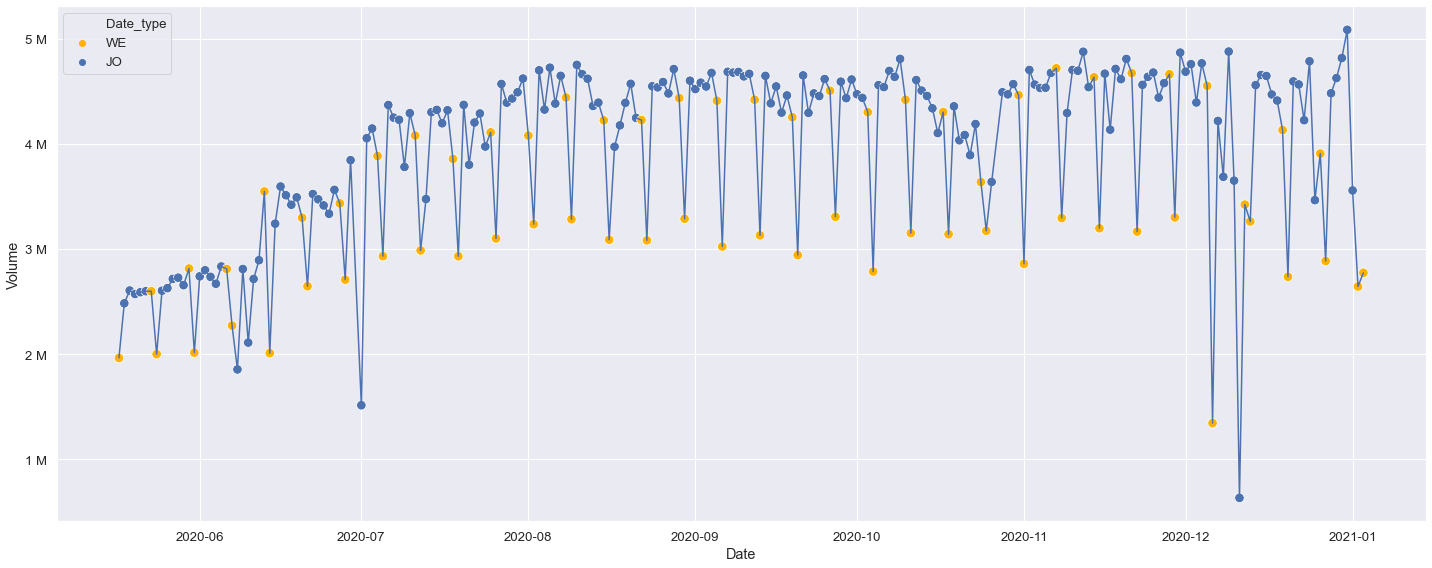

In [109]:
fig = plt.figure(figsize=(20,8))
ax = sns.lineplot(x='Date',y='Volume',data=df_total_flux)
sns.scatterplot(x='Date',y='Volume',data=df_total_flux, hue = 'Date_type', ax =ax, palette = ['#ffb300','b'],s = 90)

# ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = '#e64a19', ls = '--',lw=2.5)

# ax.axvline('2020-06-29',ymin = 0, ymax = 1,color = '#e64a19', ls = '--',lw=2.5)

# style = dict(size=14, color='#607d8b')

# for d in ['2020-07-01','2020-03-04']:
#     ax.text(d,df_total_flux[df_total_flux.Date == d]['Volume'] , d, **style)

ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.tight_layout()
plt.show()

In [110]:
def filter_df_from_to(start_date, end_date, df):
    mask_base = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    return df.loc[mask_base]

In [111]:
# split dataset into ref and observation data
ref_start_date = '2020-02-18'
ref_end_date = '2020-06-29'

obs_start_date = '2020-06-30'
obs_end_date = '2021-01-29'



df_ref_gen = filter_df_from_to(ref_start_date, ref_end_date,df_hostpot)#df_agg_gen_mob.loc[mask_base]
df_obs_gen = filter_df_from_to(obs_start_date, obs_end_date,df_hostpot)#df_agg_gen_mob.loc[mask_obs]

### Overall difference

In [112]:
ref_val = df_ref_gen.groupby(['Date']).sum()['Volume'].median()
obs_val = df_obs_gen.groupby(['Date']).sum()['Volume'].median()
print(f'Overall change percent: {(obs_val-ref_val)/ref_val}')

Overall change percent: 0.6180199448057908


In [116]:
# Calculate median values for the two series, then compare them
df_ref_agg = df_ref_gen.groupby(['Date','Observation_Zone'],as_index=False).sum().groupby(['Observation_Zone'],as_index=False).median()
df_obs_agg = df_obs_gen.groupby(['Date','Observation_Zone'],as_index=False).sum().groupby(['Observation_Zone'],as_index=False).median()

In [119]:
df_merged_agg = pd.merge(df_ref_agg,df_obs_agg,left_on='Observation_Zone',right_on='Observation_Zone')

In [120]:
df_merged_agg

Observation_Zone  Date_day_x  Volume_x  Date_day_y  \
0                                ASSANEF       499.0   19471.0       961.5   
1                         Arret Bakayaou       685.0   48204.0      1062.0   
2   Arret Centre hospitalier de Kintambo       560.0   44875.5       919.5   
3                          Arret Socimat       234.5   12287.5       927.0   
4                  Arret Stade Velodrome       593.0   48996.5       981.0   
..                                   ...         ...       ...         ...   
95                                 TASOK       236.0    9376.0       432.0   
96                             UPN Djelo       599.0   41387.0      1090.5   
97                  Wenze Muselu/Gambela       926.0  172577.5      1354.5   
98           eglise protestante de lemba       544.0   43641.0      1083.0   
99                        le pain de vie       294.0   16802.0       583.5   

    Volume_y  
0    32914.5  
1    53047.5  
2    51842.0  
3    43466.5  
4    55489.0  
..       ...  
95   13886.5  
96   60188.5  
97  171706.5  
98   62844.5  
99   23441.0  

[100 rows x 5 columns]

In [121]:
df_merged_agg['delta'] = (df_merged_agg['Volume_y'] - df_merged_agg['Volume_x'])/df_merged_agg['Volume_x']
df_merged_agg

Observation_Zone  Date_day_x  Volume_x  Date_day_y  \
0                                ASSANEF       499.0   19471.0       961.5   
1                         Arret Bakayaou       685.0   48204.0      1062.0   
2   Arret Centre hospitalier de Kintambo       560.0   44875.5       919.5   
3                          Arret Socimat       234.5   12287.5       927.0   
4                  Arret Stade Velodrome       593.0   48996.5       981.0   
..                                   ...         ...       ...         ...   
95                                 TASOK       236.0    9376.0       432.0   
96                             UPN Djelo       599.0   41387.0      1090.5   
97                  Wenze Muselu/Gambela       926.0  172577.5      1354.5   
98           eglise protestante de lemba       544.0   43641.0      1083.0   
99                        le pain de vie       294.0   16802.0       583.5   

    Volume_y     delta  
0    32914.5  0.690437  
1    53047.5  0.100479  
2    51842.0  0.155241  
3    43466.5  2.537457  
4    55489.0  0.132509  
..       ...       ...  
95   13886.5  0.481069  
96   60188.5  0.454285  
97  171706.5 -0.005047  
98   62844.5  0.440033  
99   23441.0  0.395132  

[100 rows x 6 columns]

In [123]:
df_merged_agg[df_merged_agg.Observation_Zone == 'Poste']

Observation_Zone  Date_day_x  Volume_x  Date_day_y  Volume_y     delta
86            Poste       239.5   10699.5      1143.0   85070.0  6.950839

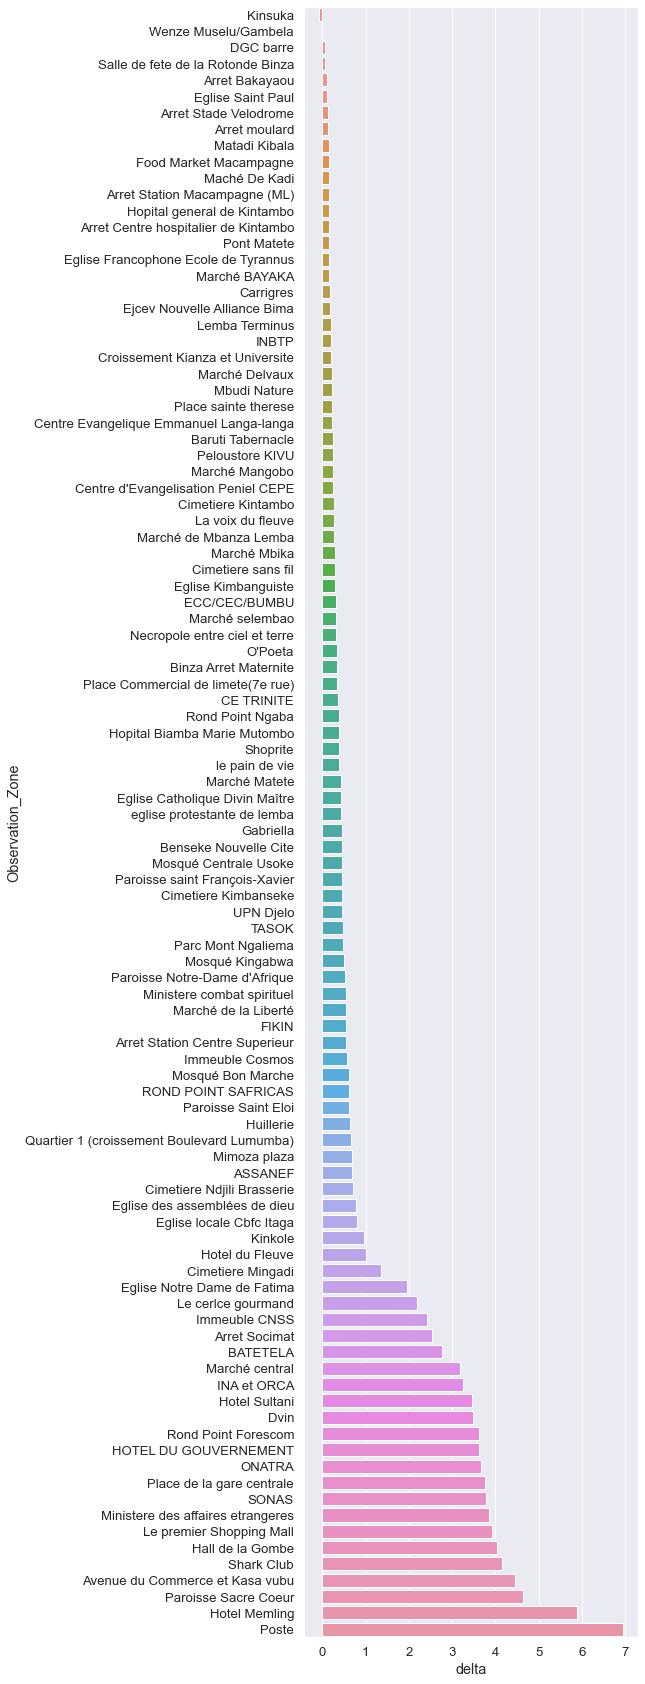

In [122]:
fig = plt.figure(figsize=(6,30))
sns.barplot(y='Observation_Zone',x='delta',data=df_merged_agg.sort_values(by = 'delta'))
plt.show()

### Trends Visualization

In [125]:
df_ref_day_agg = df_ref_gen.groupby(['Date','Observation_Zone','Date_day'], as_index=False).sum()
df_ref_day_agg = df_ref_day_agg.groupby(['Observation_Zone','Date_day'], as_index=False).median() 
df_obs_day_agg = df_obs_gen.groupby(['Date','Observation_Zone','Date_day'], as_index=False).sum()

In [126]:
df_trends = pd.merge(df_ref_day_agg,df_obs_day_agg,left_on=['Observation_Zone','Date_day'],right_on=['Observation_Zone','Date_day'])

In [127]:
df_trends['delta'] = (df_trends.Volume_y - df_trends.Volume_x)/df_trends.Volume_x
df_trends = df_trends.sort_values(by='Date')
df_trends

Observation_Zone  Date_day  Volume_x       Date  \
8049                     Hotel du Fleuve         2    8085.0 2020-07-01   
17907                          UPN Djelo         2   42025.0 2020-07-01   
9909            Le premier Shopping Mall         2    3024.0 2020-07-01   
17349                         Shark Club         2    3081.0 2020-07-01   
4515                                Dvin         2    2297.5 2020-07-01   
...                                  ...       ...       ...        ...   
13019  Ministere des affaires etrangeres         6     415.0 2021-01-03   
13205                  Mosqué Bon Marche         6   13750.0 2021-01-03   
13391              Mosqué Centrale Usoke         6   18325.0 2021-01-03   
13763      Necropole entre ciel et terre         6    3481.0 2021-01-03   
18599                     le pain de vie         6   12383.0 2021-01-03   

       Volume_y     delta  
8049       7191 -0.110575  
17907     17182 -0.591148  
9909       4809  0.590278  
17349      5441  0.765985  
4515       3261  0.419369  
...         ...       ...  
13019      3087  6.438554  
13205     18522  0.347055  
13391     20920  0.141610  
13763      3950  0.134731  
18599     16757  0.353226  

[18600 rows x 6 columns]

In [128]:
df_trends[df_trends.delta>2]

Observation_Zone  Date_day  Volume_x       Date  \
7677                       Hotel Memling         2    8867.0 2020-07-01   
7890                       Hotel Sultani         3    9364.0 2020-07-02   
7704                       Hotel Memling         3    9524.0 2020-07-02   
16074                              Poste         3   11084.0 2020-07-02   
6960               HOTEL DU GOUVERNEMENT         3    5119.5 2020-07-02   
...                                  ...       ...       ...        ...   
17483                         Shark Club         6     810.0 2021-01-03   
14135                             ONATRA         6    1951.0 2021-01-03   
9113                     Immeuble Cosmos         6    2112.0 2021-01-03   
10043           Le premier Shopping Mall         6     588.0 2021-01-03   
13019  Ministere des affaires etrangeres         6     415.0 2021-01-03   

       Volume_y     delta  
7677      30520  2.441976  
7890      31699  2.385199  
7704      61293  5.435636  
16074     73489  5.630188  
6960      17234  2.366344  
...         ...       ...  
17483      2464  2.041975  
14135      6343  2.251153  
9113       6472  2.064394  
10043      2714  3.615646  
13019      3087  6.438554  

[3368 rows x 6 columns]

In [129]:
g = sns.FacetGrid(df_trends, row="Observation_Zone",aspect=3,height=6,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(plt.plot, "Date", "delta", alpha=.7)
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
plt.tight_layout()
g.add_legend()
plt.show()
